In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#make data for train, validate
#1.training data
xt=np.linspace(-np.pi,np.pi,21)
yt=np.sin(xt)+np.random.normal(0,0.5,(21))

#2. validation data
xv=np.linspace(-np.pi,np.pi,10)
yv=np.sin(xv)+np.random.normal(0,0.5,(10))

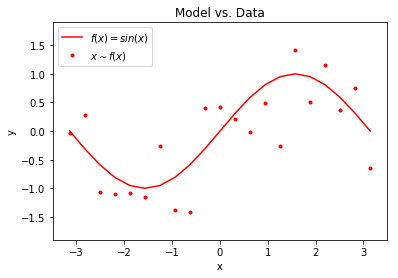

In [3]:
#3. plot true model and training data
plt.plot(xt,np.sin(xt),'r-',label = '$f(x)=sin(x)$')
plt.plot(xt,yt,'r.',label = '$x \sim f(x)$')

plt.xlim((-3.5,3.5))
plt.ylim((-1.9,1.9))

plt.xlabel('x')
plt.ylabel('y')
plt.title('Model vs. Data')

plt.legend()
plt.show()

In [4]:
# d 값의 행렬 만들기
def get_matrix(x,y,d):
    n = x.size
    Xin = np.zeros((n,d+1))
    
    for i in range(d+1):
        Xin[:,i] = x**i
    
    Y=np.reshape(y,(-1,1))
    return Xin,Y
    
#     n=x.size
#     Xin=np.reshape(x,(-1,1))
#     X=np.((n,1))
#     for i in range(d+1):
#         X=np.append(X,Xin**i,axis=1)
        
#     Y=np.reshape(y,(-1,1))
#     return X,Y

In [5]:
#4-1. Gain W
#transpose, 역행렬 계산->w, y_pred (loss_func MSE)
def gain_W(X,y):
    A=np.matmul(X.transpose(),X)#(d,n)*(n,d)=(d,d)
    B=np.matmul(np.transpose(X),y)#(d,n)*(n*1)=(d*1)
    W=np.linalg.solve(A,B)#(d,d)*(d*1)=(d*1)
    return W

def gain_y_pred(X,W):
    y=np.matmul(X,W)#(n,d)*(d*1)=(n*1)
    return y

In [6]:
#4-3. Gain MSE
def MSE(y_pred, yt):
    mse =np.square(np.subtract(y_pred.reshape(-1),yt.reshape(-1))).mean()
    return mse

MSE_train=[]
MSE_val=[]

No handles with labels found to put in legend.


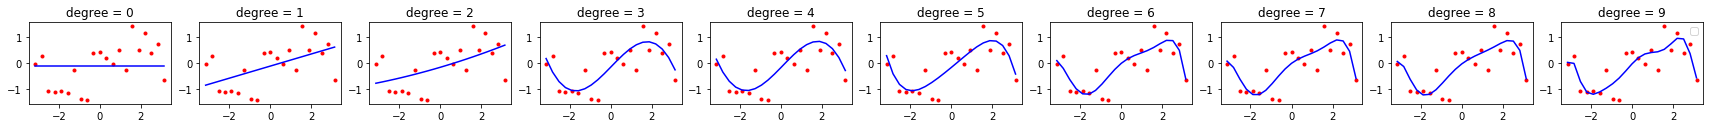

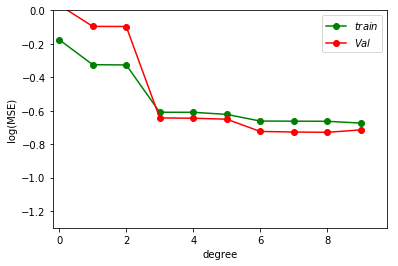

In [7]:
#main function : iteration, w
def main(xt,yt,xv,yv):
#4-4. plot for d 0~9
    f,axes = plt.subplots(nrows=1,ncols=10, figsize=(30,1.5))
    
    
    for d in np.arange(10):     #iteration d 1~9 ,w,y_pred(train,val),MSE
        #training: d 에 맞춰 행렬 만들기
        X1,y1=get_matrix(xt,yt,d)

#4-1. Gain W
        #transpose, 역행렬 계산->w, y_pred (loss_func MSE)
        w=gain_W(X1,y1)
        yt_pred=gain_y_pred(X1,w)
        
#4-2. Gain y_predictions
        #validation -> ypred
        X2,y2=get_matrix(xv,yv,d)
        yv_pred=gain_y_pred(X2,w)
        
        #append for MSE plot
        MSE_train.append(MSE(yt_pred,yt))
        MSE_val.append(MSE(yv_pred,yv))
#4-4. subplots
        #visualize each d polynomial with training data    
        axes[d].plot(xt,yt,'r.')
        axes[d].plot(xt,yt_pred,'b-')
        axes[d].set_title('degree = '+str(d))
    plt.legend()    
    plt.show()
    
#5. plot MSE
    # plot true model and training data
    plt.plot(range(10),np.log10(MSE_train),'go-',label = '$train$')
    plt.plot(range(10),np.log10(MSE_val),'ro-',label = '$Val$')

    plt.xlim((-0.2,9.8))
    plt.ylim((-1.3,0))

    plt.xlabel('degree')
    plt.ylabel('log(MSE)')

    plt.legend()
    plt.show()
    
main(xt,yt,xv,yv)